<a href="https://colab.research.google.com/github/salexey1990/gb/blob/master/cv/cv01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

import imageio

In [2]:
img = imageio.imread('cat-color.png')
img = img.astype(np.float32) / 255.
print(img.shape)

(667, 730, 3)


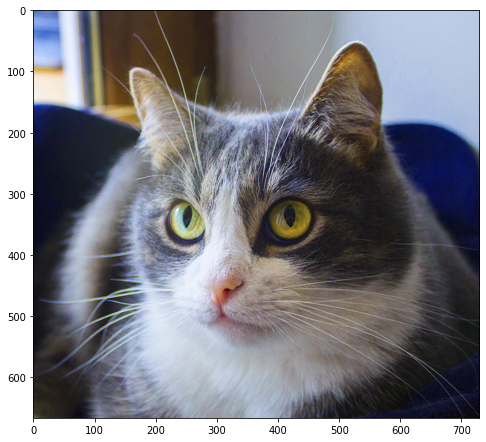

In [3]:
plt.figure(figsize=(8, 8))
plt.imshow(img)

In [0]:
def rgb2hsv(rgb):
    out = np.empty_like(rgb)

    # -- V channel
    out_v = rgb.max(-1)

    # -- S channel
    delta = rgb.ptp(-1)
    # Ignore warning for zero divided by zero
    old_settings = np.seterr(invalid='ignore')
    out_s = delta / out_v
    out_s[delta == 0.] = 0.

    # -- H channel
    # red is max
    idx = (rgb[..., 0] == out_v)
    out[idx, 0] = (rgb[idx, 1] - rgb[idx, 2]) / delta[idx]

    # green is max
    idx = (rgb[..., 1] == out_v)
    out[idx, 0] = 2. + (rgb[idx, 2] - rgb[idx, 0]) / delta[idx]

    # blue is max
    idx = (rgb[..., 2] == out_v)
    out[idx, 0] = 4. + (rgb[idx, 0] - rgb[idx, 1]) / delta[idx]
    out_h = (out[..., 0] / 6.) % 1.
    out_h[delta == 0.] = 0.

    np.seterr(**old_settings)

    # -- output
    out[..., 0] = out_h
    out[..., 1] = out_s
    out[..., 2] = out_v

    # # remove NaN
    out[np.isnan(out)] = 0

    return out

In [0]:
def hsv2rgb(hsv):
    hi = np.floor(hsv[..., 0] * 6)
    f = hsv[..., 0] * 6 - hi
    p = hsv[..., 2] * (1 - hsv[..., 1])
    q = hsv[..., 2] * (1 - f * hsv[..., 1])
    t = hsv[..., 2] * (1 - (1 - f) * hsv[..., 1])
    v = hsv[..., 2]

    hi = np.stack([hi, hi, hi], axis=-1).astype(np.uint8) % 6
    out = np.choose(hi, [np.stack((v, t, p), axis=-1),
                         np.stack((q, v, p), axis=-1),
                         np.stack((p, v, t), axis=-1),
                         np.stack((p, q, v), axis=-1),
                         np.stack((t, p, v), axis=-1),
                         np.stack((v, p, q), axis=-1)])

    return out

In [6]:
hsv_img = rgb2hsv(img)
hsv_img[:5, :5, :]

Array([[[0.61702126, 0.5136612 , 0.7176471 ],
        [0.6180555 , 0.51891893, 0.7254902 ],
        [0.6088435 , 0.5297297 , 0.7254902 ],
        [0.6088435 , 0.5240642 , 0.73333335],
        [0.61702126, 0.5136612 , 0.7176471 ]],

       [[0.6185567 , 0.53296703, 0.7137255 ],
        [0.6180555 , 0.5217391 , 0.72156864],
        [0.6180555 , 0.5217391 , 0.72156864],
        [0.6175439 , 0.5277778 , 0.7058824 ],
        [0.6175439 , 0.5248619 , 0.70980394]],

       [[0.6185567 , 0.5388889 , 0.7058824 ],
        [0.6180555 , 0.5217391 , 0.72156864],
        [0.6180555 , 0.51336896, 0.73333335],
        [0.6175439 , 0.5277778 , 0.7058824 ],
        [0.6088435 , 0.5355191 , 0.7176471 ]],

       [[0.6111111 , 0.5238095 , 0.7411765 ],
        [0.6116667 , 0.52910054, 0.7411765 ],
        [0.605     , 0.53763443, 0.7294118 ],
        [0.605     , 0.53763443, 0.7294118 ],
        [0.6088435 , 0.5212766 , 0.7372549 ]],

       [[0.6094771 , 0.5396825 , 0.7411765 ],
        [0.60891086, 0.534

In [0]:
img_hsv_new = np.copy(hsv_img)
img_hsv_new[:, :, 2] **= 0.5
img_new = hsv2rgb(img_hsv_new)

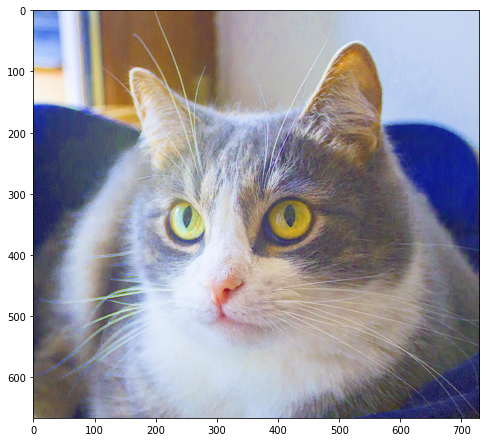

In [8]:
plt.figure(figsize=(8, 8))
plt.imshow(img_new)

In [0]:
img_bw = np.mean(img, axis=2)

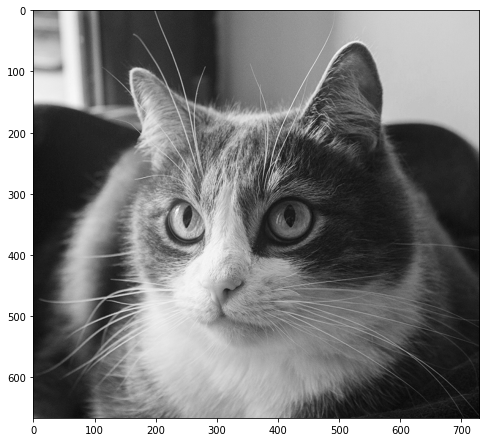

In [10]:
plt.figure(figsize=(8, 8))
plt.imshow(img_bw, cmap='gray')

In [0]:
from skimage import filters

In [0]:
edge_roberts = filters.roberts(img_bw)

In [25]:
edge_roberts

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.0083189 , 0.01984608, ..., 0.        , 0.00837005,
        0.        ],
       [0.        , 0.00703939, 0.01582184, ..., 0.00703943, 0.00206681,
        0.        ],
       ...,
       [0.        , 0.03721474, 0.03245676, ..., 0.02157853, 0.11757442,
        0.        ],
       [0.        , 0.01663781, 0.02661343, ..., 0.06145181, 0.01637904,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]], dtype=float32)

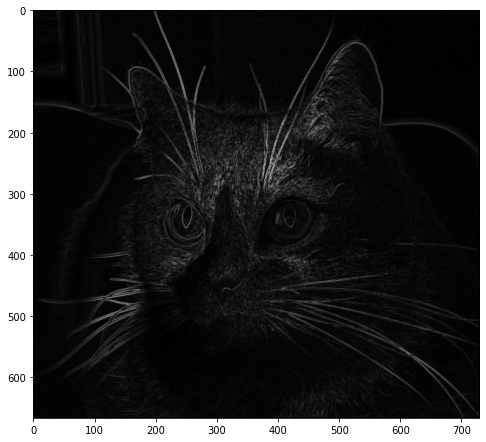

In [24]:
plt.figure(figsize=(8, 8))
plt.imshow(edge_roberts, cmap='gray')

In [0]:
img_hsv_new = np.copy(hsv_img)
img_hsv_new[:, :, 2] +=3*edge_roberts
img_new = hsv2rgb(img_hsv_new)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


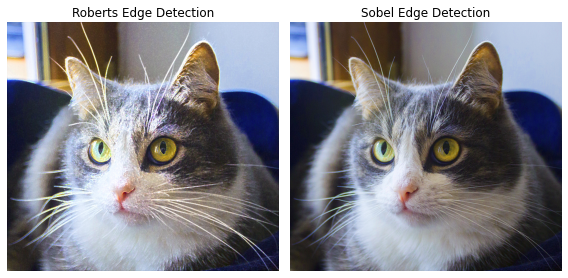

In [38]:
fig, axes = plt.subplots(ncols=2, sharex=True, sharey=True,
                         figsize=(8, 4))

axes[0].imshow(img_new, cmap=plt.cm.gray)
axes[0].set_title('Roberts Edge Detection')

axes[1].imshow(img, cmap=plt.cm.gray)
axes[1].set_title('Sobel Edge Detection')

for ax in axes:
    ax.axis('off')

plt.tight_layout()
plt.show()